# Import Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create Variable For list of Path_dir

In [2]:
path_dir = "C:/Users/Lenovo/Documents/Sales_Data/"
for files in os.listdir(path_dir):
    print(files)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


# Consolidate The Files Using For Loop

In [3]:
finalDf = pd.DataFrame()
for files in os.listdir(path_dir):
    DataFrame = pd.read_csv(path_dir+files)
    finalDf = pd.concat([finalDf,DataFrame],ignore_index=True)
    

In [4]:
# Shape of the dataframe

finalDf.shape

(186850, 6)

In [5]:
# Top 5 element of the dataset

finalDf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
# Checking Null values


finalDf.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# Print info about the dataframe

finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Clean Up The Data

In [8]:
# Drop Rows Of NaN

nan_df = finalDf[finalDf.isna().any(axis=1)]
nan_df.head()

finalDf = finalDf.dropna(how='all')
finalDf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
finalDf = finalDf[finalDf['Order Date'].str[0:2] != 'Or']

# Convert Column To The Correct Type

In [10]:
finalDf['Quantity Ordered'] = pd.to_numeric(finalDf['Quantity Ordered'])
finalDf['Price Each'] = pd.to_numeric(finalDf['Price Each'])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/236949111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Quantity Ordered'] = pd.to_numeric(finalDf['Quantity Ordered'])
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/236949111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Price Each'] = pd.to_numeric(finalDf['Price Each'])


In [11]:
finalDf['Month'] = finalDf['Order Date'].str[0:2]
finalDf['Month'] = finalDf['Month'].astype('int32')
finalDf.head(100)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/4223833043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Month'] = finalDf['Order Date'].str[0:2]
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/4223833043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Month'] = finalDf['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016",4
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215",4
98,176651,iPhone,1,700.00,04/07/19 13:14,"997 South St, Boston, MA 02215",4
99,176652,LG Washing Machine,1,600.00,04/09/19 20:04,"502 14th St, New York City, NY 10001",4


# 1. What was the best month for sales and why?


In [12]:
# Add A Sales Column

In [13]:
finalDf['Sales'] = finalDf['Quantity Ordered'] * finalDf['Price Each']
finalDf.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/4208221631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Sales'] = finalDf['Quantity Ordered'] * finalDf['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
sales = finalDf.groupby('Month').sum()
sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


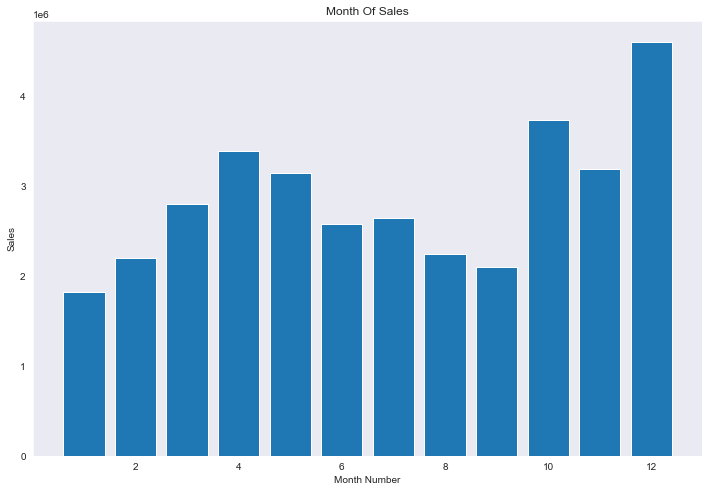

In [15]:
fig = plt.figure(figsize=(12, 8))
sns.set_style("dark")
months = range(1,13)

plt.bar(months,sales['Sales'])
plt.ylabel('Sales')
plt.xlabel('Month Number')
plt.title('Month Of Sales')
plt.show()

In [16]:
# Conclusion : The best month for sales is December.Because the Quantity of Orderd are sold Higher Than The Other and also
# the credit goes to the salesperson and the company marketing team. The company earned approximately $4,510,000.



# 2. Which city sold the most product?


In [17]:
# Add a City Column
# use apply() method

def get_City(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

finalDf['City'] = finalDf['Purchase Address'].apply(lambda x: get_City(x) + ' ' +get_state(x))
finalDf.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/2107842258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['City'] = finalDf['Purchase Address'].apply(lambda x: get_City(x) + ' ' +get_state(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [18]:
result = finalDf.groupby(['City']).sum().sort_values('Quantity Ordered', ascending = False)
result.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,50239,8211461.74,315520,8262203.91
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40


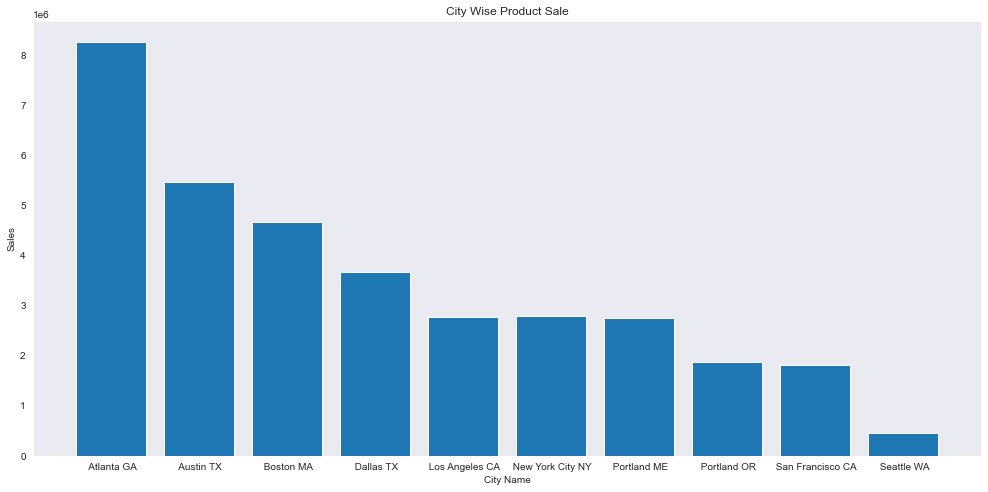

In [19]:
fig = plt.figure(figsize=(17, 8))
sns.set_style("dark")
cities = [City for City, Df in finalDf.groupby('City') ]

plt.bar(cities,result['Sales'])
plt.ylabel('Sales')
plt.xlabel('City Name')
plt.title('City Wise Product Sale')
plt.show()

In [20]:
# Conclusion : San Francisco CA is the city with the highest sales.This is a Electonic Store thats why there is most sale

#  3. What time should we display advertisements to maximize likelihood of customer’s buying products and why?



In [21]:
# Change The Datatype


finalDf['Order Date'] = pd.to_datetime(finalDf['Order Date'])


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/633043100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Order Date'] = pd.to_datetime(finalDf['Order Date'])


In [22]:
# Creating Hour & Minute Columns

finalDf['Hour'] = finalDf['Order Date'].dt.hour
finalDf['Minute'] = finalDf['Order Date'].dt.minute


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/616408727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Hour'] = finalDf['Order Date'].dt.hour
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/616408727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Minute'] = finalDf['Order Date'].dt.minute


In [23]:
finalDf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [24]:
a = finalDf.groupby(['Hour']).count()
a.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


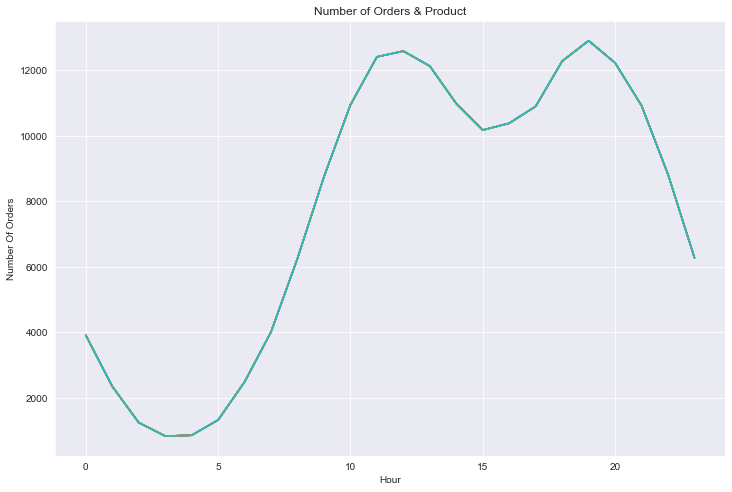

In [25]:
fig = plt.figure(figsize=(12, 8))
sns.set_style("dark")
plt.plot(a)
plt.title('Number of Orders & Product')
plt.xlabel('Hour')
plt.ylabel('Number Of Orders')
plt.grid()
plt.show()

In [26]:
# Conclusion : there are approximately 2 peaks of the data ,We can suggest to advertise the products right before 12 PM and/or 7 PM.
# It could be 11 AM and/or 6 PM. it makes sense since most people shopping during the day

# 4. Which product sold the most? Why do you think it did?


In [27]:
product = finalDf.groupby(['Product'])
Quantity_Ordered = product.sum()['Quantity Ordered']
Quantity_Ordered.head().reset_index()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


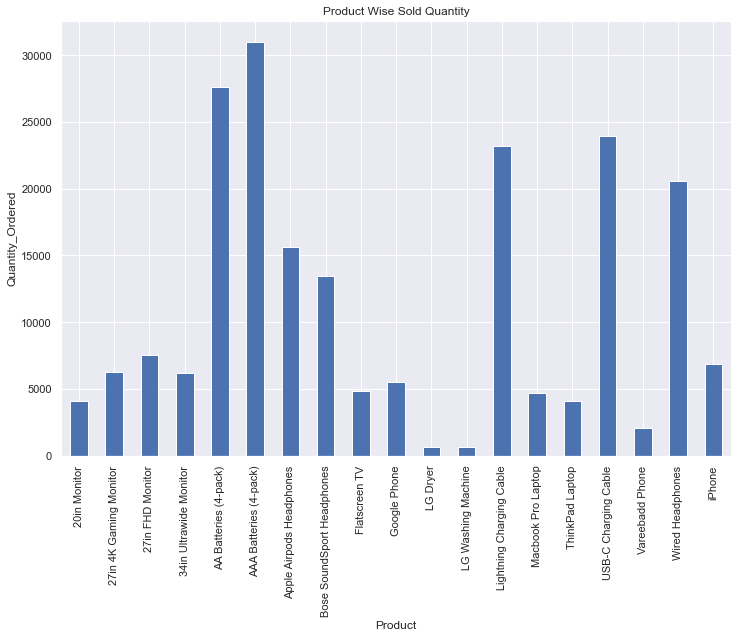

In [28]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(12, 8))
Quantity_Ordered.plot(kind='bar')
plt.title('Product Wise Sold Quantity')
plt.xlabel('Product')
plt.ylabel('Quantity_Ordered')
plt.show()

In [29]:
prices = finalDf.groupby(['Product']).mean()['Price Each']
prices.head().reset_index()

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84


In [30]:
# Conclusion : AAA Batteries(4 pack) is the most sold product. Because it’s Price
# cheaper than other products and has high demand.



# 5. What Products are most often sold together?

In [31]:
df = finalDf[finalDf['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


df = df[['Order ID','Grouped']].drop_duplicates()

df.head().reset_index()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/1703387049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,index,Order ID,Grouped
0,3,176560,"Google Phone,Wired Headphones"
1,18,176574,"Google Phone,USB-C Charging Cable"
2,30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,32,176586,"AAA Batteries (4-pack),Google Phone"
4,119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
# Conclusion :
# we can see that most often sold products are Google Phone,Wired Headphones, comapany offer a smart deal to the customer
# that buy phone, you could recommend the wired headphones and charging cable with discount.
# thats the possibility and you can bundle the remaining products.

# 6. What Is The Overall Sales Trend?

In [33]:
finalDf['Order Date'].min()

Timestamp('2019-01-01 03:07:00')

In [34]:
finalDf['Order Date'].max()

Timestamp('2020-01-01 05:13:00')

In [35]:
# Getting Month Year  from the dataset
finalDf['Month_Year'] = finalDf['Order Date'].apply({lambda x: x.strftime('%y-%m')})

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12444/3940994466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['Month_Year'] = finalDf['Order Date'].apply({lambda x: x.strftime('%y-%m')})


In [36]:
# Grouping Month Year
finalDf_trend = finalDf.groupby(['Month_Year']).sum()['Sales'].reset_index()
finalDf_trend

,Month_Year,Sales
0,19-01,1813586.44
1,19-02,2202022.42
2,19-03,2807100.38
3,19-04,3390670.24
4,19-05,3152606.75
5,19-06,2577802.26
6,19-07,2647775.76
7,19-08,2244467.88
8,19-09,2097560.13
9,19-10,3736726.88


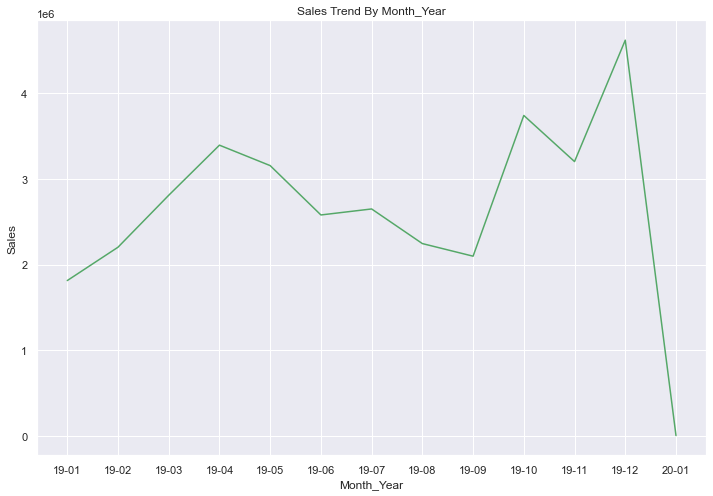

In [37]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(12, 8))
plt.plot(finalDf_trend['Month_Year'], finalDf_trend['Sales'], color='g')
plt.title('Sales Trend By Month_Year')
plt.xlabel('Month_Year')
plt.ylabel('Sales')
plt.show()

In [38]:
# Conclusion:
# if we clearly observe the data, the starting 3 month sales are quite low, then littile up and then also down
# but after 9 month sales are much more high from the first one, means the oveall company is growing.

In [39]:
finalDf.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute',
       'Month_Year'],
      dtype='object')

# Which Are the top 10 product by sales?

In [40]:
# Grouping product name column

product = pd.DataFrame(finalDf.groupby(['Product']).sum()['Sales'])


In [41]:
# sort product column

product.sort_values('Sales',ascending=False).head(10).reset_index()

,Product,Sales
0,Macbook Pro Laptop,8037600.00
1,iPhone,4794300.00
2,ThinkPad Laptop,4129958.70
3,Google Phone,3319200.00
4,27in 4K Gaming Monitor,2435097.56
5,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
7,Flatscreen TV,1445700.00
8,Bose SoundSport Headphones,1345565.43
9,27in FHD Monitor,1132424.50


<Figure size 1080x576 with 0 Axes>

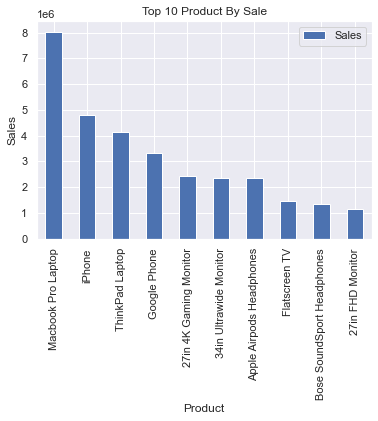

In [42]:
# Visualize 

sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(15, 8))
product = pd.DataFrame(finalDf.groupby(['Product']).sum()['Sales'])
product.sort_values('Sales',ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Product By Sale')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

In [43]:
# Conclusion:
# In the above , we simply shows the top 10 product on sale.from the graph we can see that the highest salling product is 
# the Macbook pro laptop, we can say that there are many people in the world need laptops